# **갯끈풀 발생 영향 변수 도출 및 갯벌별 확산 위험등급 산출**

- **갯끈풀 차차차 Team - 구희연, 양재영, 구병모** 


---

![갯끈풀 차차차](https://drive.google.com/uc?export=view&id=1FcEPid9I8tG7tJ-AWXR7DPbDXZjyUFa0)

안녕하세요. **갯끈풀 차차차**팀입니다!

최근 전 세계에서 기후위기를 경험하면서 자연기반 해결책의 중요성이 점점 강조되고 있습니다. 그 중 갯벌은 ‘환경 정화작용’에 뛰어나고 산소의 많은 양을 생산하고 있습니다. 또한, 다양한 생물군이 서식하고 자연재해를 막아주는 방파제 역할을 하는 갯벌의 가치는 무궁무진합니다. 단순히 개발을 억제한다는 개념을 넘어서 장기적이고 지속 가능한 관점에서 갯벌을 보존해야합니다. 

하지만 우리나라에 **갯끈풀**이라는 유해 식물이 유입되어 갯벌이 파괴되고 있습니다.
번식력이 매우 강한 갯끈풀은 확산하는 초기에 대응하는 것이 중요합니다. 
이러한 이유로 갯끈풀의 서식 환경을 분석하고 선제적인 대응이 가능하도록 **갯벌별 위험 등급**을 산출했습니다.

---

### **목차**

#### 1. 개요
- ##### 1.1. 갯끈풀의 특징 및 유해성
- ##### 1.2. 갯끈풀의 국내 서식 현황

#### 2. 데이터셋 구성
- ##### 2.1. 국내 갯벌 격자화
- ##### 2.2. 갯끈풀 서식지 시각화 지도
- ##### 2.3. Joiss 해양환경측정망 데이터
- ##### 2.4. 국가 해양생태계 종합조사 데이터
- ##### 2.5. 역거리 가중 보간법(IDW) 

#### 3. 탐색적 데이터 분석(EDA)
- ##### 3.1. 변수별 Box Plot
- ##### 3.2. Correlation Heatmap & 주성분 분석(PCA)
- ##### 3.3. Randomforest 기반 변수 중요도

#### 4. 데이터 모델링
- ##### 4.1. 로지스틱 회귀모형
- ##### 4.2. KMeans Clustering

#### 5. 결론
- ##### 5.1. 군집 기반 위험도 시각화
- ##### 5.2. 기대 효과
- ##### 5.3. 한계점

#### 6. 참고문헌

#### 7. 부록

---

## **1. 서론**

#### 1.1. 갯끈풀의 특징 및 유해성

**갯끈풀**은 벼과 식물이며 전 세계적으로 Spartina 속에 약 17종 가량 존재하는 것으로 알려져 있습니다. 원산지는 아메리카대륙과 유럽, 북아프리카 지역이며 다년생 초본식물로, 뿌리부분은 강하고 잔뿌리가 많으며 줄기는 직립 형태로 잎은 두텁고 넓은 긴 칼 모양의 형태적 특성을 보입니다.

외래종 및 유해생물로 인한 생태계의 교란 및 건강성 파괴는 전 세계적 환경문제로 대두 되고 있습니다. 유해생물 침입은 토착생태계의 붕괴, 생물다양성 감소, 수산자원 감소 등 생태･경제 학적 손실을 일으킵니다.
갯끈풀은 세계자연보전연맹(IUCN) 에서 지정한 **100대 악성 생태계 위해 외래 식물**입니다. 기존의 염생식물을 대체하여 갯벌이 Spartina 속 단일 종으로 초지화되어 갯벌 생태계에 심각한 교란을 유발합니다. 지하의 뿌리와 뿌리줄기의 연결이 그물처럼 밀집되면서 저서 생물 서식에 부적합한 환경으로 바뀝니다. 방대한 뿌리와 밀집한 줄기가 물의 흐름을 느리게 하고, 침전물을 가두어 갯벌 표고를 높여 갯벌은 육상화되어 본래의 기능을 상실하게 됩니다. 이런 결과는 갯벌에 의존하는 조류와 철새에 불리할 뿐 아니라 인간의 갯벌 이용에도 문제가 되며, 갯벌의 위락적 기능도 저하시키게 됩니다. 무엇보다도 갯끈풀은 <a href="https://www.hani.co.kr/arti/society/environment/748187.html">빠르게 확산</a>하기 때문에 번식 위험지역을 지속적으로 모니터링하여 선제적으로 대처할 수 있도록 해야합니다.


#### 1.2. 갯끈풀의 국내 서식 현황

국내에서 갯끈풀의 출현이 공식적으로는 강화도 남단 동막리 해안에서 **2012년**부터 출현한 것으로 보고되었습니다. 2020년 기준 국내 갯끈풀 분포지역은 강화도, 신도, 영종도, 장봉도, 대부도, 서천군, 진도, 김제 등 총 8개소로 알려져 있습니다.

국내 갯끈풀 서식지의 총 면적은 2008년부터 2017년까지 5,776% 증가했고, 2017년부터 2020년까지 35%정도 증가했습니다.


![국내 갯끈풀 면적](https://drive.google.com/uc?export=view&id=1Ye6QM1xzRf0ha_0dBP9nv6rtjo_WU_Sq)

---

## **2. 데이터셋 구성**

#### 2-1. 국내 갯벌 격자화

<a href="https://coast.mof.go.kr/coastKnowledge/coastDatumView.do?dt3=&seq=7669&data_type=3&page=1">해양수산부 연안 포털</a>에서 2020년도 갯벌 현황도 shp 파일을 QGIS를 활용하여 표현했습니다.

![국내 갯벌 현황도](https://drive.google.com/uc?export=view&id=1d2r1P8cX1OFGYLEz-ibSlGS_zekFnf-l)

<a href="http://www.khoa.go.kr/oceangrid/khoa/takepart/openapi/openApiObsGridInfo.do">바다누리 해양정보 서비스 </a>에서 제공하는 바다 격자 정보를 사용했습니다. 갯벌의 구역을 나눌때 3단계 바다 격자보다 4단계 바다 격자로 하면 훨씬 더 자세하고 구체적인 지역 선정을 하기 쉽습니다. 그러한 이유에서 3단계 격자보다 4단계 격자 정보로 갯벌 구역을 세분화 했습니다. 먼저 3단계 격자데이터 중 갯벌과 중첩되는 부분만을 남기고 다시 4단계 격자로 분할한 뒤 갯벌과 중첩되는 부분만을 선택했습니다.

- 초록색 : 갯벌 shp / 노란색(불투명) : 3단계 격자 shp / 빨간색(불투명) : 4단계 격자 shp

![국내 갯벌 격자화](https://drive.google.com/uc?export=view&id=1DIT79pgT_Ahp8CIPyQS_I8A_0QWqJc9l)

#### 2.2. 갯끈풀 서식지 시각화 지도

2020년 갯끈풀 제거 및 관리 사업 보고서와 <a href="https://www.naturing.net/o/card">네이처링</a> 을 참고하여 갯끈풀의 위치를 QGIS에 폴리곤으로 표시했습니다.

![갯끈풀 서식지 시각화](https://drive.google.com/uc?export=view&id=1L9TRndVSUyH_GCB_JI1IWnfCDlxmfZ3W)

#### 2.3. Joiss 해양환경측정망 데이터

<a href = "https://joiss.kr/joiss/"> joiss 관할해역해양정보 공동활용시스템</a>에서 제공하는 해양환경측정망 데이터는 우리나라 연안 및 근해역의 해양환경 상태와 오염원에 대한 조사를 정기적으로 실시하여 해양환경 현황을 종합적으로 파악한 기본 자료입니다.

![Joiss 해양환경측정망 데이터](https://drive.google.com/uc?export=view&id=1E_bxWJm-NpWbLHJAT3S-QVX9ngBtEZhs)

#### 2.4. 국가 해양생태계 종합조사 데이터

<a href="https://www.data.go.kr/data/15012624/fileData.do">해양환경공단</a>에서 제공하는 국가 해양생태계 종합조사 보고서를 통해 추출한 데이터입니다. 서해와 남해지역에 대한 조사는 최근 2019년에 이루어졌고 그 중 연안지역에 관한 속성들을 추출했습니다. 해당 데이터는 위치 속성과 퇴적물 속성, 갯벌 해양생물 속성 등을 포함합니다.

![국가 해양생태계 종합조사 데이터](https://drive.google.com/uc?export=view&id=1Ch1iLH_37qTkKa7ahQ8gP6EcDZnjhNZK)

#### 2.5. 역거리 가중 보간법(IDW) 

앞서 소개한 Joiss 해양환경측정망 데이터와 국가 해양생태계 종합조사 데이터의 위치 속성을 활용하여 QGIS에 표시했습니다. 

![포인트 좌표](https://drive.google.com/uc?export=view&id=1d9pXxzglB0s47PDxHbDw4e06XRByNsrD)

포인트 지점을 기준으로 변수를 측정했기 때문에 공간으로 구현했을 때, 비어있는 사이값을 구할 수 없습니다. 공간보간법을 사용하면 특정 지점이나 속성값을 이용하여 연속적인 공간의 속성값을 찾아낼 수 있습니다. 따라서 저희는 <a href="https://docs.qgis.org/3.16/ko/docs/user_manual/processing_algs/qgis/interpolation.html">역거리 가중 보간법(IDW)</a>를 활용하여 변수별로 연속적인 래스터 데이터를 생성한 뒤 벡터로 변환시켜 매우 작은 격자에 데이터를 할당했습니다. IDW 결과는 아래와 같이 연안지역을 중심으로 데이터 값이 분포해있음을 알 수 있습니다.

![IDW](https://drive.google.com/uc?export=view&id=1Kzod20XbOXtNmT0Qkt4cihlMe7OU78kL)

공간 보간하여 작게 분할한 벡터 데이터의 변수들을 4단계 격자에 할당한 후 median 값을 취해 격자별 갯벌 속성 데이터를 생성하였습니다. 마지막으로 해당 데이터셋에 갯끈풀을 포함한 격자에는 target 속성 값 1을 그 외의 격자에는 0을 부여하여 최종 데이터셋을 구성했습니다.

![최종 데이터셋](https://drive.google.com/uc?export=view&id=1qkC7FJspokFN0c8Vi8flVjLDIBhUYB1n)

---

## **3. 탐색적 데이터 분석(EDA)**

- Target 변수 확인

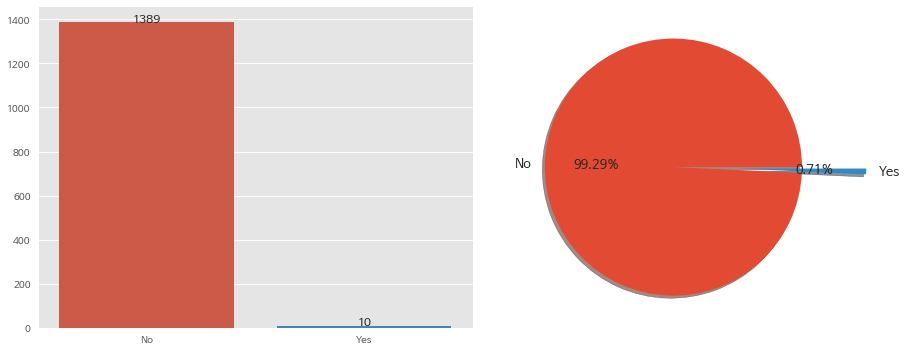

In [ ]:
# Target 데이터 확인
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))

# Countplot
sns.countplot(x = 'target', data = raw_coast_data, ax = axes[0])
axes[0].set_xticklabels(labels = ['No', 'Yes'])

for rect in axes[0].patches:
    axes[0].text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), ha = 'center', fontsize = 12)

# Pie Chart
plot_data = raw_coast_data['target'].value_counts()
plot_data.plot.pie(explode = [0, 0.5], shadow = True, labels = ['No', 'Yes'], fontsize = 13, autopct = '%.2f%%', ax = axes[1])
    
for index in [0, 1]:
    axes[index].set_xlabel('')
    axes[index].set_ylabel('')

fig.tight_layout()

- 1,399개의 격자에서 갯끈풀이 발생한 격자는 **10**개로, 전체 데이터 중에서 **0.71**%를 차지합니다.


- 위의 결과를 통해, 현재 갯끈풀 서식 분포 데이터에 불균형이 존재함을 확인할 수 있습니다.

#### 3.1. 변수별 Box Plot 

##### 3.1.1. 수온 - X

수온 변수의 왜도 : -0.9856 

수온 변수의 첨도 : 1.7005 

수온 변수의 이상치 개수 : 93 



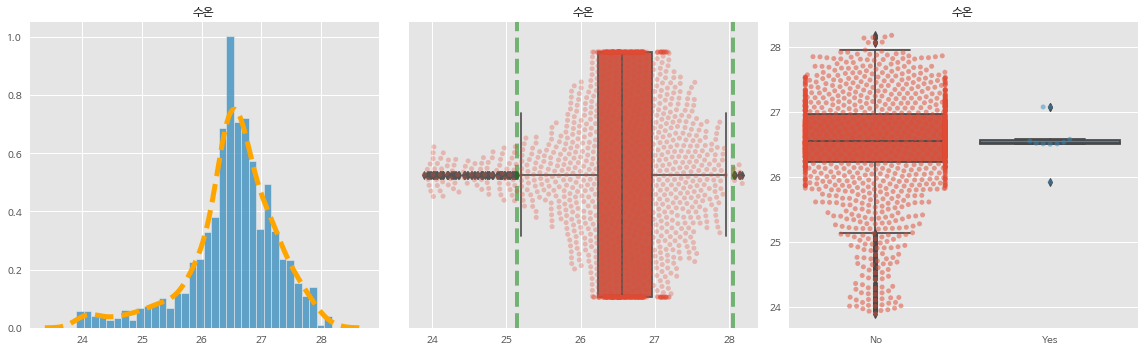

In [ ]:
stat_visual_analysis(indepen_value = '수온', depen_value = 'target', data = raw_coast_data)

- 수온 변수에는 **93**개의 이상치가 존재하며, 수온은 갯끈풀에 큰 영향을 미치지 않는 것으로 판단됩니다.

##### 3.1.2. 염분 - O

염분 변수의 왜도 : -2.3453 

염분 변수의 첨도 : 8.0809 

염분 변수의 이상치 개수 : 62 



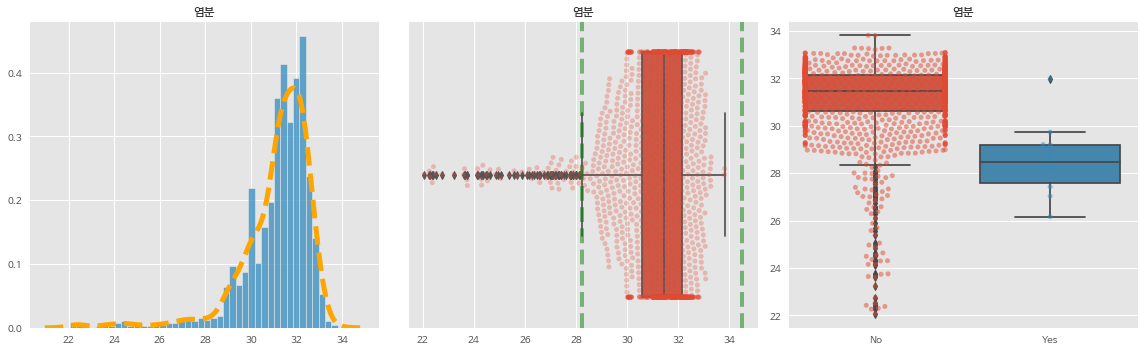

In [ ]:
stat_visual_analysis(indepen_value = '염분', depen_value = 'target', data = raw_coast_data)

- 염분 변수에는 62개의 이상치가 존재하며, 염분은 갯끈풀에 영향을 미치는 것으로 판단됩니다.

- **미기록 외래잡초 영국갯끈풀의 국내 분포와 식물학적 특성**의 논문을 살펴보면, 습하고 염도가 높은 환경을 선호한다고 했으나, 현재 데이터로 보았을 때는 너무 높은 염도에서는 발견되지 않음을 확인할 수 있습니다.

##### 3.1.3. 질소 변수 - [용존무기질소, 암모니아성 질소, 아질산성 질소, 질산성 질소, 질소]

- [JOISS 화학해양 주요용어](https://joiss.kr/joiss/cont.edu.vocaList.do)


- [Naver - Total Nitrogen](https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=k0ks0&logNo=221405525369)

- 총 질소(Total Nitrogen)는 물 속에 포함된 질소화합물(유기성 질소, 암모니아성 질소, 아질산성 및 질살성 질소) 등의 총량을 의미합니다.


- 총 질소는 자연계의 질소순환과정에서 자연수에 포함되어 있으나, 생활하수, 공장폐수, 축산폐수 등과 같은 인위적은 유입에 따라 증가합니다.


- 즉, 하천이나 바다로 다량 유입될 경우 부영양화, 적조, 수중의 용존산소결핍 등을 야기시킵니다.


- 여기서 무기성질소는 암모니아성 질소, 질산성 질소, 아질산성 질소의 합이며, 유기성 질소는 분해가 되는 경우 암모니아성 질소의 형태로 되기 때문에 총 질소는 실질적으로 무기성 질소를 나타내는 것이 된다고 합니다.

In [ ]:
# 질소 관련 변수 일부 확인
raw_coast_data[['질소', '용존무기질소', '암모니아성 질소', '아질산성질소', '질산성질소']].head()

,질소,용존무기질소,암모니아성 질소,아질산성질소,질산성질소
0,272.399140,66.109781,14.322414,6.973147,44.816863
1,269.995185,64.474075,14.593280,6.735420,43.151896
2,200.074455,27.902230,12.518333,2.279968,13.180408
3,217.344345,42.311762,19.336271,3.228646,19.809824
4,237.580635,58.525446,27.159784,4.254249,27.159876


- 위 5개의 변수가 비슷한 의미를 나타내며, (암모니아성, 아질산성, 질산성)의 합이 무기질소를 나타내기 때문에, **질소** 혹은 **용존무기질소** 두 변수 중에서 하나의 변수를 사용하는 것이 적절하다고 판단됩니다.

용존무기질소 변수의 왜도 : 2.2217 

용존무기질소 변수의 첨도 : 4.7115 

용존무기질소 변수의 이상치 개수 : 258 



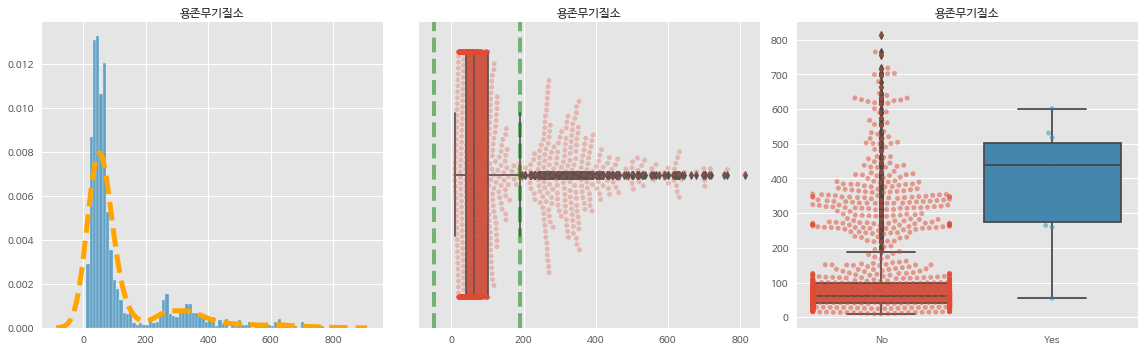

In [ ]:
# 용존무기질소 변수 확인
stat_visual_analysis(indepen_value = '용존무기질소', depen_value = 'target', data = raw_coast_data)

질소 변수의 왜도 : 1.9021 

질소 변수의 첨도 : 3.2269 

질소 변수의 이상치 개수 : 249 



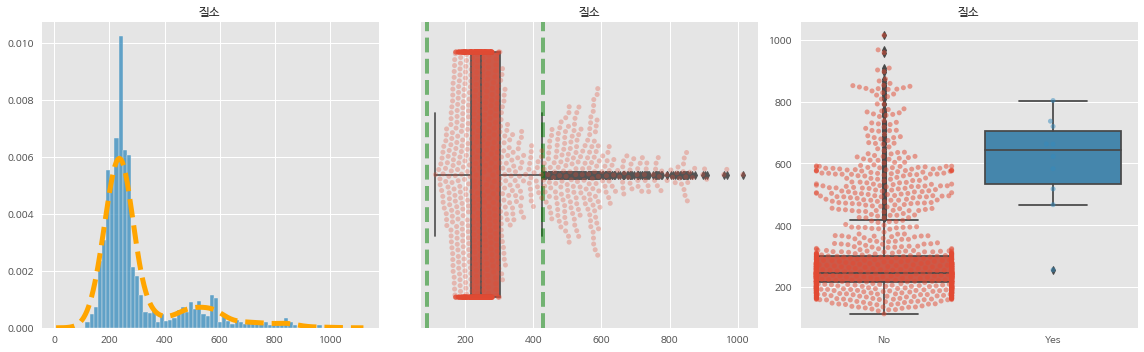

In [ ]:
# 총 질소를 나타내는 '질소' 변수 확인
stat_visual_analysis(indepen_value = '질소', depen_value = 'target', data = raw_coast_data)

- 두 변수 분포가 비슷하나 **질소** 변수의 왜도와 첨도가 더 낮으므로 **질소** 변수를 사용하겠습니다.


- 또한, 갯끈풀 발생 지역이 질소가 높은 것으로 보아, 갯끈풀이 발생한 지역은 환경적으로 좋지 않다는 것을 알 수 있습니다.

##### 3.1.4. 수소이온농도 - 구간화

- [Naver - 지식백과](https://terms.naver.com/entry.naver?docId=5145248&cid=61234&categoryId=61234)


- [해양산성화와 해양생태계](file:///C:/Users/KCG/Downloads/%ED%95%B4%EC%96%91%EC%82%B0%EC%84%B1%ED%99%94%EC%99%80%20%ED%95%B4%EC%96%91%EC%83%9D%ED%83%9C%EA%B3%84_%EB%B6%84%EC%84%9D%EB%B3%B4%EA%B3%A0%EC%84%9C_%EA%B9%80%EC%A3%BC%EC%98%81.pdf)

- 수소이온농도는 용액 1L 속에 존재하는 수소 이온의 몰수를 의미하며, 용액의 산성, 알칼리성의 정도를 나타내는 수치를 말합니다.


- 수소이온농도가 급변하거나 장기간에 걸쳐 무르이 산성화를 유발하는 경우 인체, 환경 또는 주변서식 동식물에게 큰 영향을 미칠 수 있습니다.


- 해양산성화는 해수의 수소이온농도가 증가하는 현상을 의미하며, 수소이온농도가 증가하는 이유는 대기 중에 존재하는 이산화탄소가 바닷물에 녹아들기 때문입니다.


- pH는 수소이온의 활성도를 표현하는 지수이며, 용액의 산성도를 평가하는데 활용됩니다. 또한, 범위는 0부터 14입니다.


- 현재 데이터의 경우 IDW 기법을 사용하여 데이터를 보간했기 때문에 지정된 범위를 넘어서는 관측치가 발견됩니다.


- 따라서 동일하게 개수를 나눠 구간화를 수행해주겠습니다.

In [ ]:
print('Shape of Coast data *Before Create* :', raw_coast_data.shape, '\n')

raw_coast_data['수소이온농도_구간'] = pd.qcut(raw_coast_data['수소이온농도'], 5, labels = ['구간1', '구간2', '구간3', '구간4', '구간5'])
print('Shape of Coast data *After Create* :', raw_coast_data.shape)

Shape of Coast data *Before Create* : (1399, 31) 

Shape of Coast data *After Create* : (1399, 32)


In [ ]:
display(pd.crosstab(raw_coast_data['target'], raw_coast_data['수소이온농도_구간']))

수소이온농도_구간,구간1,구간2,구간3,구간4,구간5
target,,,,,
0,271,280,279,280,279
1,9,0,0,0,1


- 갯끈풍에 해당되는 지역이 매우 소수이기 때문에 뚜렷한 차이를 확인할 수 없지만, **구간1**에서 대부분 관측됨을 확인할 수 있습니다.

##### 3.1.5. 부유물질 농도 - O

- [부유물질이란?](https://airsafetytimes.tistory.com/43)


- [MyWater - 물백과사전](https://www.water.or.kr/encyclopedia/encyclopedia/encyclopediaview.do?seq=527&p_group_seq=526&menu_mode=4&currentPageNo=44&search_Hangulindex=%E3%85%82&search_Engindex=&TERM_SEQNO=2259&HANGULTERM=&ENGTERM=&COMM_CODE=&ATTFILE_SEQNO=&languege=h&searchTextBefor=&searchText=)

- 부유물질은 물에 용해되지 않으면서 입자 지금이 2mm 이하인 물속에서 부유하고 있는 물질을 일컫는 말로 오염된 물의 수질을 표시하는 지표입니다.


- 하천 등 자연수역에 방류되면 물의 탁도를 높이고 외관을 더럽히며, 그 중 생물분해 가능한 유기물질은 용존산소를 감소시킵니다.

부유물질 농도 변수의 왜도 : 2.5882 

부유물질 농도 변수의 첨도 : 9.5112 

부유물질 농도 변수의 이상치 개수 : 100 



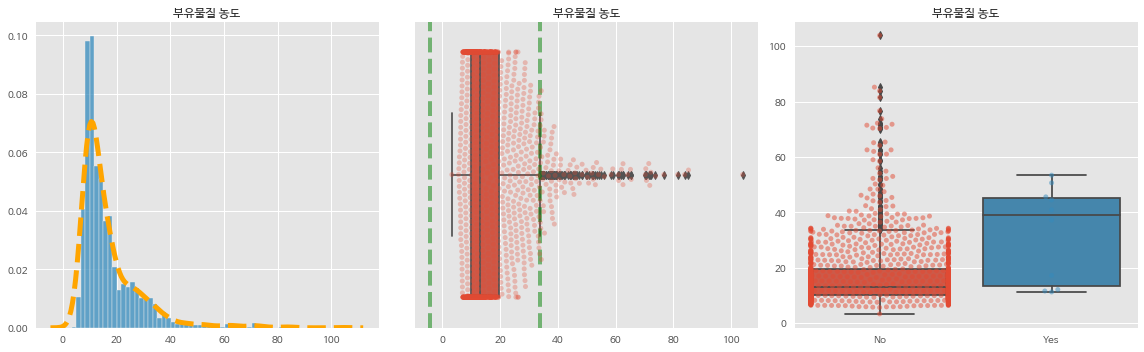

In [ ]:
stat_visual_analysis(indepen_value = '부유물질 농도', depen_value = 'target', data = raw_coast_data)

- 부유물질 농도 변수에는 100개의 이상치가 존재하며, 갯끈풀 발생 지역의 부유물질 농도가 높음을 확인할 수 있습니다.


- 부유물질 농도는 갯끈풀에 영향을 미치는 것으로 판단됩니다.

##### 3.1.6. 규산염 - O

- [위키백과 - 규산염](https://ko.wikipedia.org/wiki/%EA%B7%9C%EC%82%B0%EC%97%BC)

- 규산염은 조암 광물 중 가장 많은 양을 차지하는 광물로 규소와 산소 및 약간의 금속 원소로 이루어져 있습니다.

규산염 변수의 왜도 : 1.367 

규산염 변수의 첨도 : 1.7662 

규산염 변수의 이상치 개수 : 105 



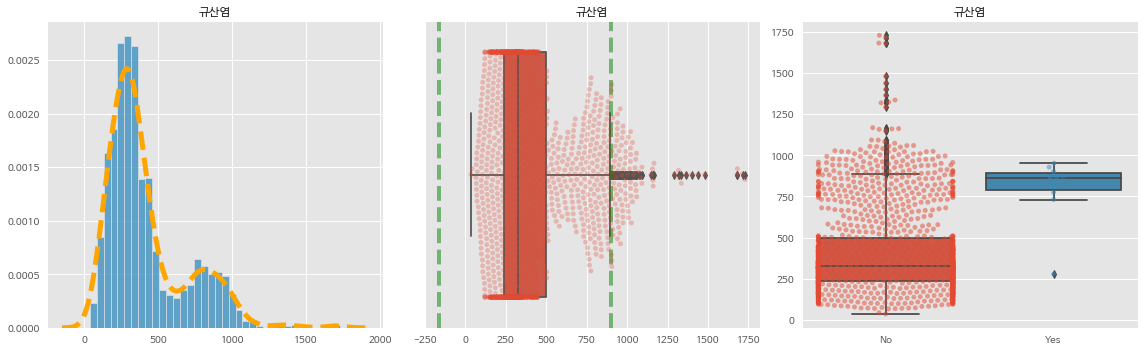

In [ ]:
stat_visual_analysis(indepen_value = '규산염', depen_value = 'target', data = raw_coast_data)

- 규산염 변수에는 이상치가 105개 존재하며, 쌍봉형태를 나타내고 있습니다.


- 갯끈풀이 발생한 지역은 규산염이 많이 분포해 있음을 확인할 수 있습니다.

##### 3.1.7. 화학적산소 요구량 - O

- [JOISS 해양과학 주요용어](https://joiss.kr/joiss/cont.edu.vocaList.do)

- 화학적산소요구량(Chemical Oxygen Demand, COD)은 화학적으로 분해 가능한 유기물을 산화제(시약)를 이용하여 산화시키는 데 필요한 산소의 양을 말합니다.


- 즉, COD 값이 높으면 유기물이 많다는 것으로 그만큼 오염의 정도가 높은 것을 의미합니다. (값이 클수록 수질오염이 심합니다.)

화학적산소 요구량 변수의 왜도 : 1.0351 

화학적산소 요구량 변수의 첨도 : 2.9986 

화학적산소 요구량 변수의 이상치 개수 : 65 



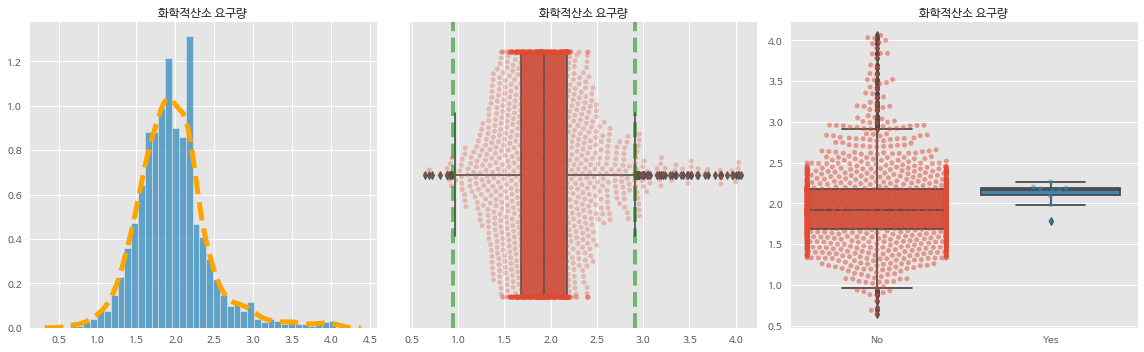

In [ ]:
stat_visual_analysis(indepen_value = '화학적산소 요구량', depen_value = 'target', data = raw_coast_data)

- 화학적산소 요구량 변수는 정규분포에 가까움을 확인할 수 있으며, 이상치의 개수는 65개입니다.


- 갯끈풀이 아닌 지역은 해당 변수의 분포가 전 범위에 걸쳐져 있지만, 갯끈풀이 발생한 지역은 어느정도 화학적산소 요구량이 높은것으로 보아 수질의 오염이 있다는 것을 확인할 수 있습니다.

##### 3.1.8. 투명도 - O

- [JOISS 해양과학 주요용어](https://joiss.kr/joiss/cont.edu.vocaList.do)

- 투명도 즉, 물의 투명함 정도를 나타내는 것으로 투명도판이라 불리는 백색 원판을 수중에 넣어서 보이지 않는 데가지의 깊이를 미터로 표시합니다.


- 물이 맑을수록 투명도가 높아집니다.

투명도 변수의 왜도 : 1.5033 

투명도 변수의 첨도 : 2.8818 

투명도 변수의 이상치 개수 : 89 



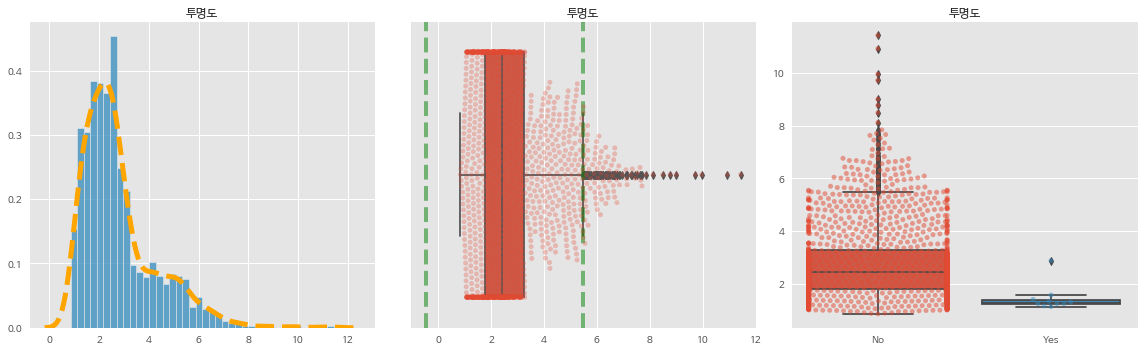

In [ ]:
stat_visual_analysis(indepen_value = '투명도', depen_value = 'target', data = raw_coast_data)

- 갯끈풀이 발생한 지역의 투명도 값은 낮은 곳에 분포해 있음을 확인할 수 있으며, 물이 맑지 않다는 것을 확인할 수 있습니다.

##### 3.1.9. 인 변수 - [인산염인, 총인]

- [JOISS 해양과학 주요용어](https://joiss.kr/joiss/cont.edu.vocaList.do)

- 총 인(Total Phosphorus)는 물 속에 포함된 인화합물(입자성 인, 유기성 인, 폴리인산염, 인산염이온 등)의 총 농도를 의미합니다.


- 질소와 인은 주로 농업용 비료, 사람이나 가축의 분뇨, 합성세제로 부터 발생되며, 하천이나 바다로 다량 유입될 경우 부영양화, 적조, 수중의 용존산소결핍 등을 야기시킨다고 합니다.


- 인산염인, 총인 두 개의 변수 분포를 확인 후 하나의 변수만 사용하겠습니다.

인산염인 변수의 왜도 : 1.547 

인산염인 변수의 첨도 : 1.335 

인산염인 변수의 이상치 개수 : 243 



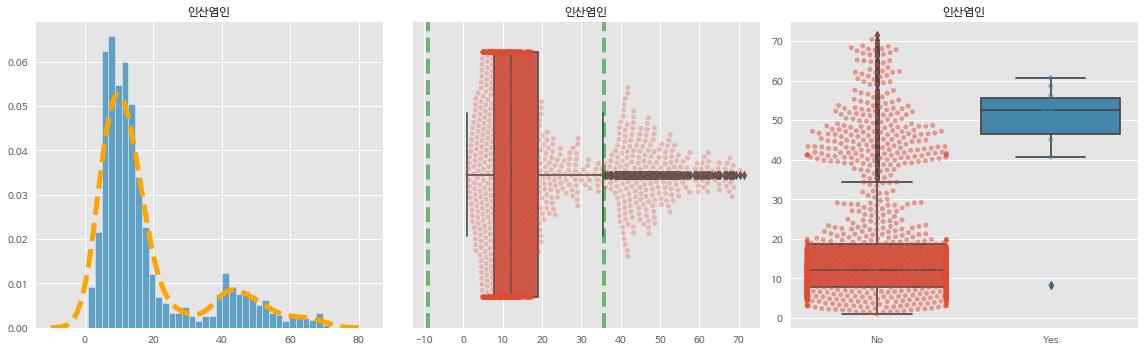

In [ ]:
# 인산염인
stat_visual_analysis(indepen_value = '인산염인', depen_value = 'target', data = raw_coast_data)

총인 변수의 왜도 : 1.3629 

총인 변수의 첨도 : 1.0701 

총인 변수의 이상치 개수 : 121 



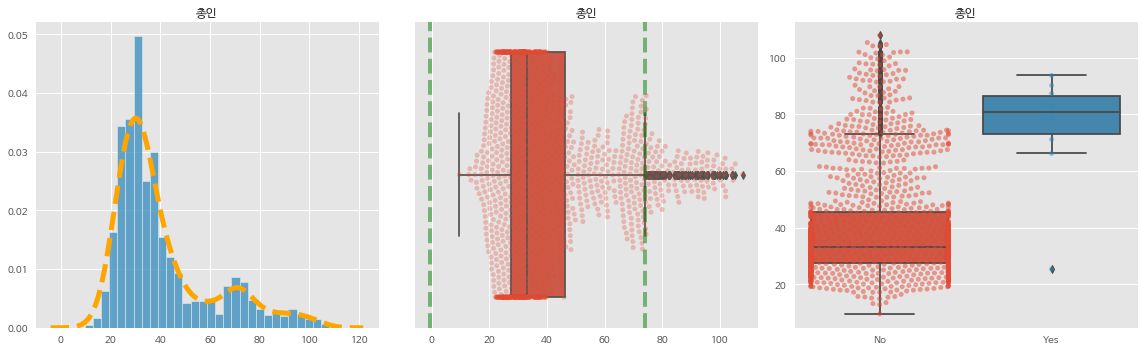

In [ ]:
# 총인
stat_visual_analysis(indepen_value = '총인', depen_value = 'target', data = raw_coast_data)

- 인산염인과 총인 두 변수 모두 쌍봉형태를 나타내고 있음을 확인할 수 있습니다.


- 두 변수의 분포가 매우 비슷하지만, 총인 변수의 왜도와 첨도가 더 낮기 때문에 **총인** 변수를 사용하겠습니다.

##### 3.1.10. 자갈 - O

자갈 변수의 왜도 : 3.2178 

자갈 변수의 첨도 : 15.9328 

자갈 변수의 이상치 개수 : 78 



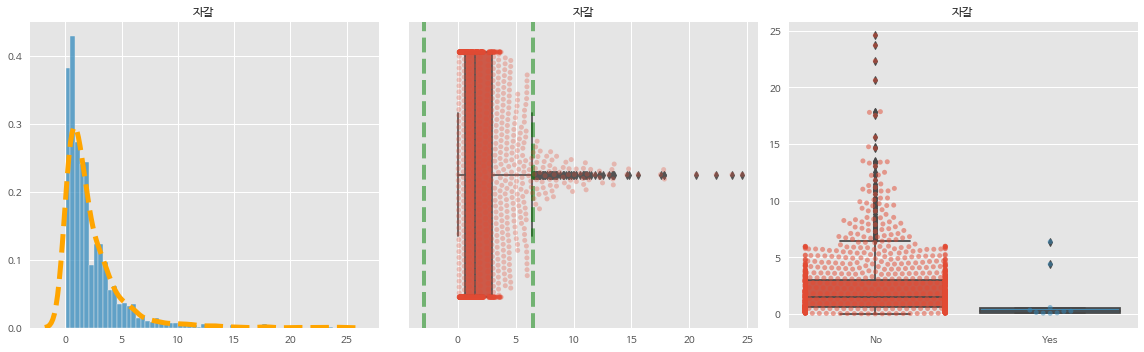

In [ ]:
stat_visual_analysis(indepen_value = '자갈', depen_value = 'target', data = raw_coast_data)

- 자갈 변수의 경우 왼쪽으로 치우쳐져 있으며, 첨도가 매우 높음을 확인할 수 있습니다.


- 갯끈풀이 발생한 지역의 자갈 비율이 매우 작음을 확인할 수 있으며, 영향이 있는 것으로 판단됩니다.

##### 3.1.11. 모래, 실트, 점토 - 실트

- 실트는 모래보다 작고 점토보다 큰 토양입자입니다.


- 모래, 실트, 점토 세 개의 변수가 비슷하기 때문에 세 변수의 분포 확인 후, 변수를 줄여주겠습니다.

모래 변수의 왜도 : 0.739 

모래 변수의 첨도 : 0.1374 

모래 변수의 이상치 개수 : 22 



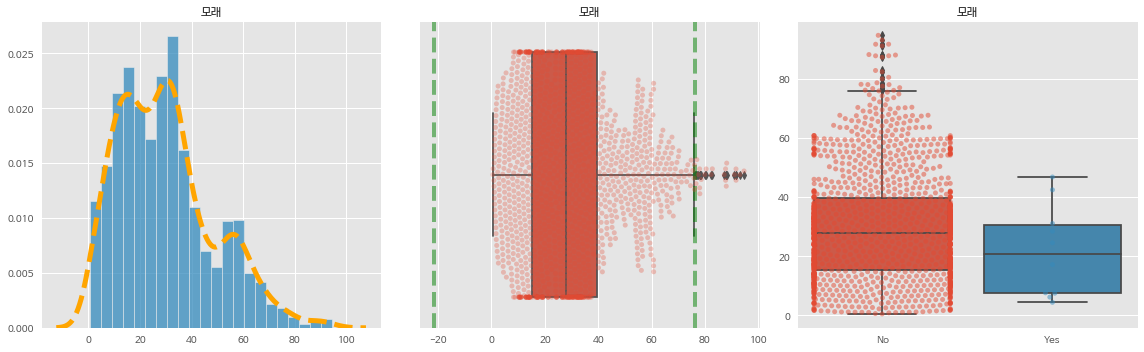

In [ ]:
# 모래 변수 분포 확인
stat_visual_analysis(indepen_value = '모래', depen_value = 'target', data = raw_coast_data)

실트 변수의 왜도 : -0.4673 

실트 변수의 첨도 : 0.6909 

실트 변수의 이상치 개수 : 44 



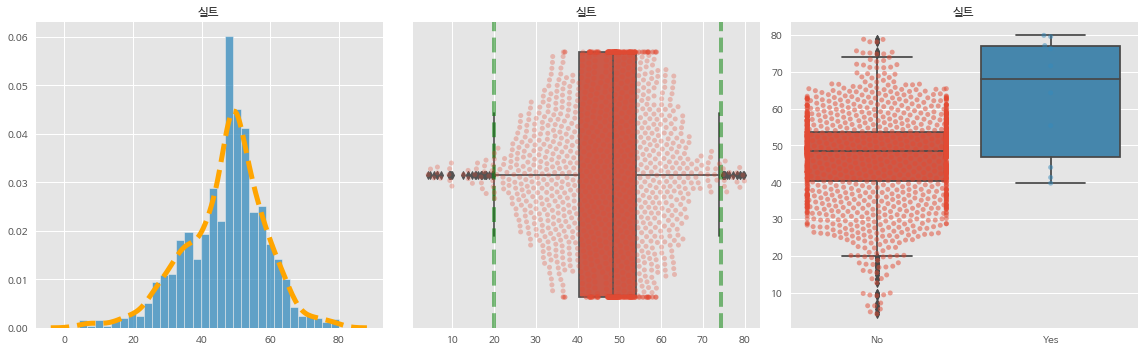

In [ ]:
# 실트 변수 분포 확인
stat_visual_analysis(indepen_value = '실트', depen_value = 'target', data = raw_coast_data)

점토 변수의 왜도 : 0.3676 

점토 변수의 첨도 : -0.8298 

점토 변수의 이상치 개수 : 0 



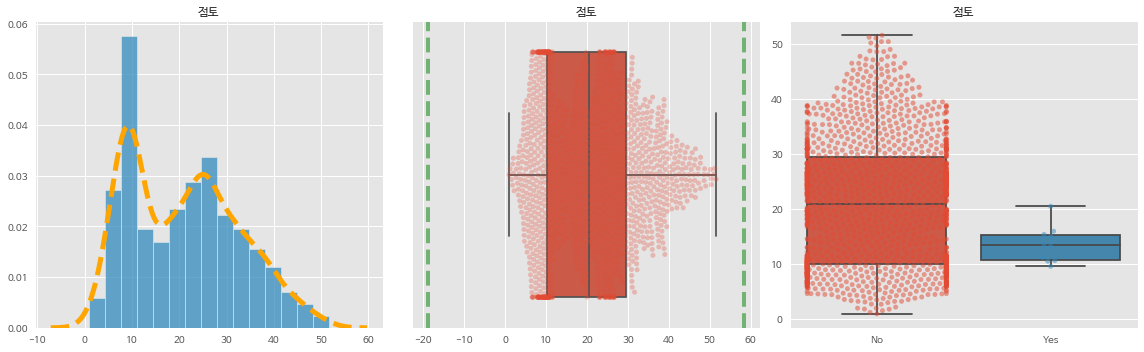

In [ ]:
# 점토 변수 확인
stat_visual_analysis(indepen_value = '점토', depen_value = 'target', data = raw_coast_data)

- 세 변수 모두 왜도와 첨도가 낮고, 이상치가 매우 적거나 아예 없음을 확인할 수 있습니다.


- 세 변수 중에서 실트 변수가 가장 영향력이 있는 것으로 판단되기 때문에 **실트** 변수를 사용하겠습니다.

##### 3.1.12. 분급 - O

- [JOISS 해양과학 주요용어](https://joiss.kr/joiss/cont.edu.vocaList.do)

- 퇴적물은 모래, 자갈 등 여러가지 크기의 입자가 섞여 있는데, 분급도는 퇴적물의 입자가 어느 정도 균일한지를 나타내는 척도입니다.

분급 변수의 왜도 : -0.5409 

분급 변수의 첨도 : -0.3799 

분급 변수의 이상치 개수 : 0 



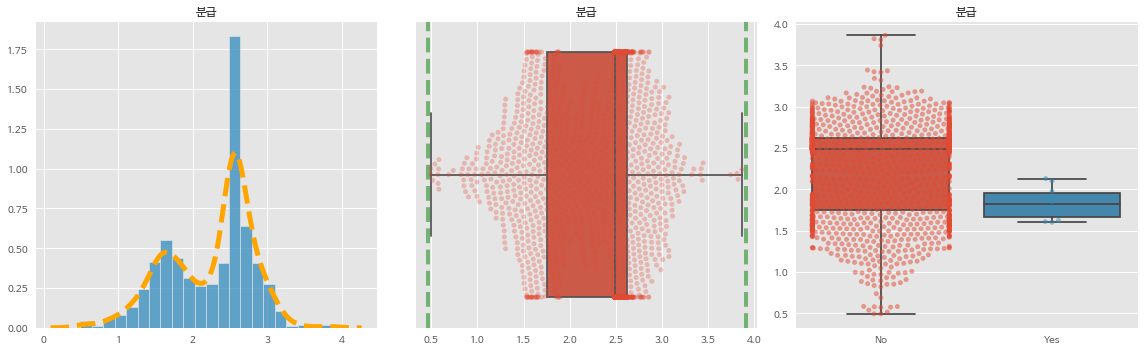

In [ ]:
stat_visual_analysis(indepen_value = '분급', depen_value = 'target', data = raw_coast_data)

##### 3.1.13. TOC - O

- [JOISS 해양과학 주요용어](https://joiss.kr/joiss/cont.edu.vocaList.do)


- https://kr.hach.com/parameters/toc

- 총 유기탄소(Total Organic Carbon)는 물 속 유기오염물질이 가진 탄소의 총량으로 수질오염 정도를 나타내는 주요 지표입니다.


- 유기물은 강 또는 하천의 환경에 유독하며 물의 산소 수준을 대폭 감소시키고, 유기 폐기물은 어류를 질식시킬 수 있으며, 다른 여러 방식으로 수상 생태계에 영향을 끼칠 수 있습니다.

TOC 변수의 왜도 : 0.2984 

TOC 변수의 첨도 : -0.8576 

TOC 변수의 이상치 개수 : 0 



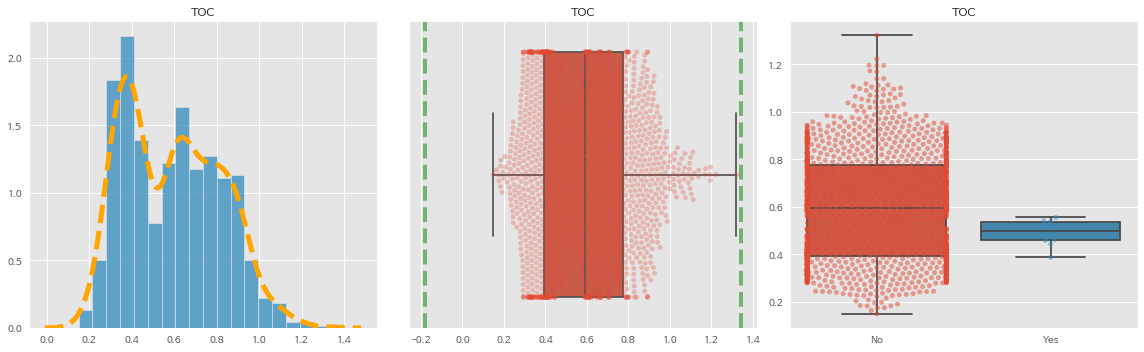

In [ ]:
stat_visual_analysis(indepen_value = 'TOC', depen_value = 'target', data = raw_coast_data)

- 갯끈풀에 큰 영향을 주는것으로 보이지는 않지만 수질오염 정도를 나타내는 변수이기 때문에 추가하겠습니다.

##### 3.1.14. 출현 종수 - X

출현 종수 변수의 왜도 : 1.2425 

출현 종수 변수의 첨도 : 3.3702 

출현 종수 변수의 이상치 개수 : 71 



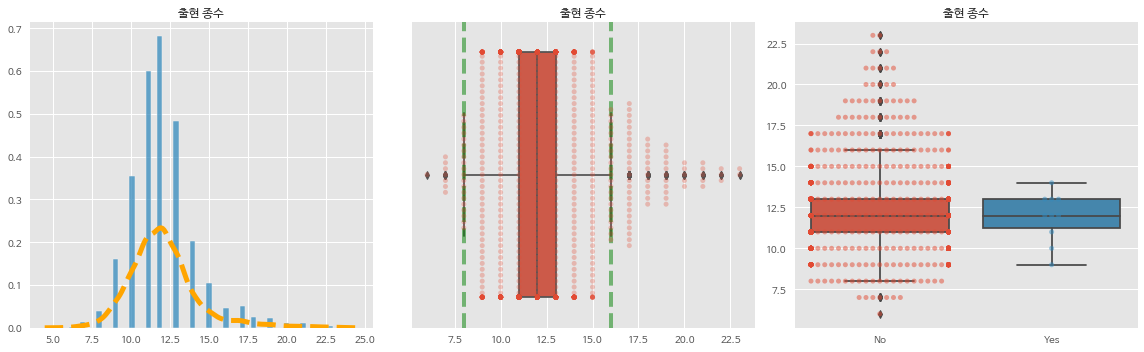

In [ ]:
stat_visual_analysis(indepen_value = '출현 종수', depen_value = 'target', data = raw_coast_data)

- 출현 종수 변수는 이산형이며, 갯끈풀이 발생한 지역과 그렇지 않은 지역의 분포가 비슷함을 확인할 수 있습니다.


- 따라서 갯끈풀 발생에 영향을 미치지 않는 것으로 판단됩니다.

##### 3.1.15. 서식밀도 - X

서식밀도 변수의 왜도 : 3.761 

서식밀도 변수의 첨도 : 22.8841 

서식밀도 변수의 이상치 개수 : 124 



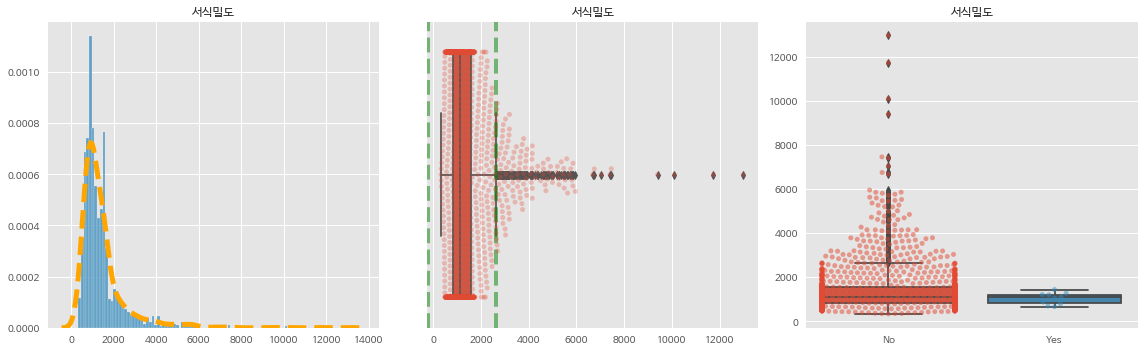

In [ ]:
stat_visual_analysis(indepen_value = '서식밀도', depen_value = 'target', data = raw_coast_data)

- 서식밀도 변수의 경우 첨도가 매우 높음을 확인할 수 있습니다.


- 또한, 갯끈풀 발생에 영향을 미치지 않는 것으로 판단됩니다.

##### 3.1.16. 생체량 - 구간화

생체량 변수의 왜도 : 2.7988 

생체량 변수의 첨도 : 14.7916 

생체량 변수의 이상치 개수 : 30 



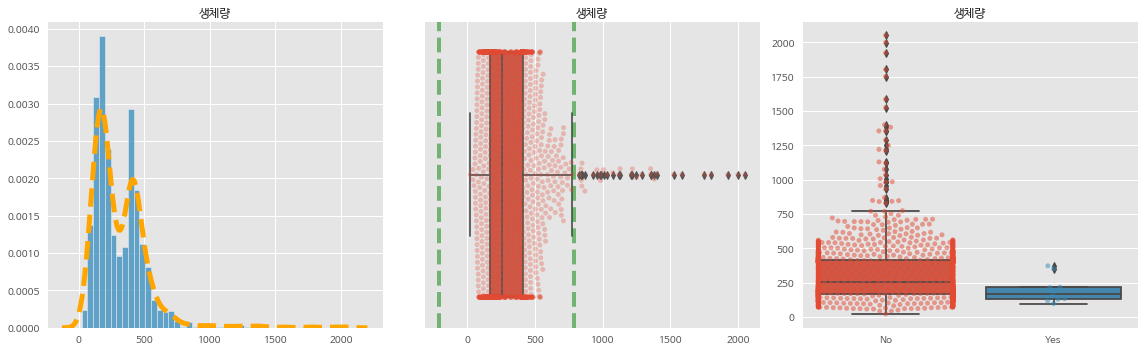

In [ ]:
stat_visual_analysis(indepen_value = '생체량', depen_value = 'target', data = raw_coast_data)

- 생체량 변수의 경우 왼쪽으로 치우쳐져 있으며, 첨도가 매우 높음을 확인할 수 있습니다.


- 갯끈풀이 발생한 지역은 생체량이 낮은 곳에 분포해 있는것을 확인할 수 있습니다.


- 값의 범위가 너무 크기 때문에 구간화를 해서 살펴보겠습니다.

In [ ]:
print('Shape of Coast data *Before Create* :', raw_coast_data.shape, '\n')

raw_coast_data['생체량_구간'] = pd.cut(raw_coast_data['생체량'], 6, labels = ['구간1', '구간2', '구간3', '구간4', '구간5', '구간6'])
print('Shape of Coast data *After Create* :', raw_coast_data.shape)

Shape of Coast data *Before Create* : (1399, 32) 

Shape of Coast data *After Create* : (1399, 33)


In [ ]:
display(pd.crosstab(raw_coast_data['target'], raw_coast_data['생체량_구간']))

생체량_구간,구간1,구간2,구간3,구간4,구간5,구간6
target,,,,,,
0,851,493,27,9,4,5
1,9,1,0,0,0,0


##### 3.1.17. 다양도 - X

다양도 변수의 왜도 : 0.3143 

다양도 변수의 첨도 : 0.3699 

다양도 변수의 이상치 개수 : 14 



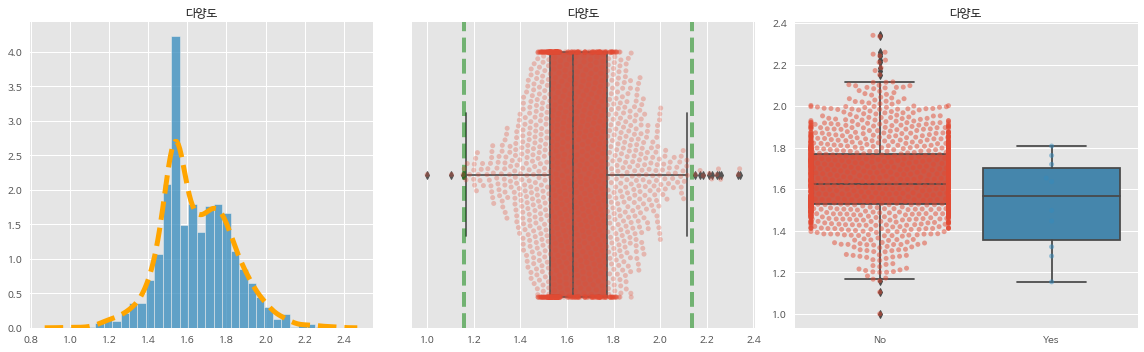

In [ ]:
stat_visual_analysis(indepen_value = '다양도', depen_value = 'target', data = raw_coast_data)

- 다양도에 따라서는 큰 차이가 없는 것으로 보이기 때문에 제외하겠습니다.

#### 3.2. Correlation Heatmap & 주성분 분석(PCA)

In [ ]:
# 분포 탐색을 통해 사용할 변수만 저장하여 데이터 생성
eda_data = raw_coast_data[['id', '염분', '질소', '수소이온농도_구간', '부유물질 농도', '규산염', '화학적산소 요구량', '투명도', '총인', '자갈', '실트', '분급', 'TOC', '생체량_구간', 'target']].copy()
display(eda_data.head())

,id,염분,질소,수소이온농도_구간,부유물질 농도,규산염,화학적산소 요구량,투명도,총인,자갈,실트,분급,TOC,생체량_구간,target
0,316,32.266284,272.399140,구간5,11.729158,304.898470,1.932255,2.790482,27.493661,2.131936,53.767258,2.241080,0.575763,구간1,0
1,317,32.312201,269.995185,구간5,11.715535,305.709195,1.920633,2.876308,27.350137,2.388136,52.496485,2.224635,0.568869,구간1,0
2,401,31.337345,200.074455,구간3,7.047915,158.576875,1.820178,2.495793,21.724608,0.564265,35.540126,1.634023,0.383511,구간1,0
3,402,31.393658,217.344345,구간2,7.970248,201.319945,1.867706,2.524248,25.360672,0.541554,36.376906,1.744004,0.408045,구간1,0
4,403,31.425321,237.580635,구간2,9.072605,253.782260,1.937710,2.545189,29.792724,0.550979,35.998440,1.816959,0.424802,구간2,0


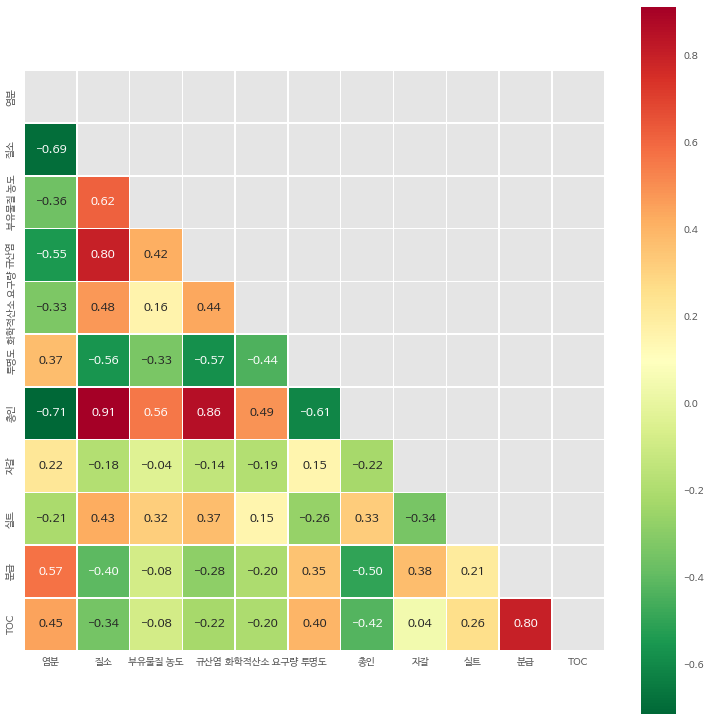

In [ ]:
# 위에서 생성한 데이터를 가지고 히트맵을 그려보겠습니다.
cor_data = eda_data.drop(['id', 'target'], axis = 1).corr()

# 옵션 지정
mask = np.zeros_like(cor_data, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵 시각화
plt.figure(figsize = (13, 13))
sns.heatmap(cor_data, mask = mask, square = True, linewidths = 0.5, cmap = 'RdYlGn_r', annot = True, fmt = '.2f', annot_kws = {'fontsize' : 12})
plt.show()

- 히트맵을 통해 서로 상관계수가 높은 변수가 있음을 확인할 수 있습니다.


- 위의 EDA를 통해 수질 오염과 관련된 **질소, 부유물질 농도, 규산염, 화학적산소 요구량, 투명도, 총인** 6개의 변수를 가지고 주성분분석(PCA)를 수행해보겠습니다.

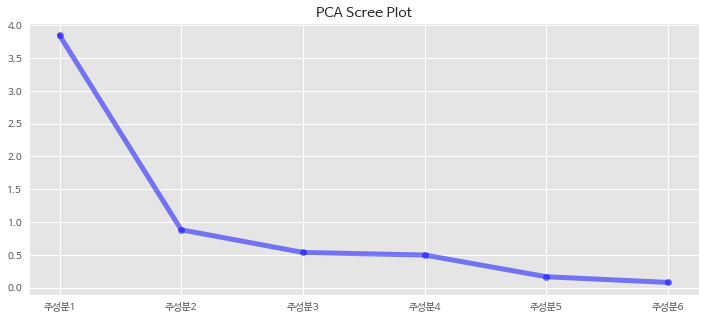

In [ ]:
# 주성분분석을 수행할 데이터만 저장
pca_data = eda_data[['질소', '부유물질 농도', '규산염', '화학적산소 요구량', '투명도', '총인']]

# 주성분분석을 수행하기 위해서 모든 변수의 단위가 다르기 때문에 Scaling을 수행해주어야 한다.
scaler = StandardScaler()

# Scaling 수행
scaler_data = pd.DataFrame(scaler.fit_transform(pca_data), columns = pca_data.columns)

# PCA 객체 생성 후 학습
pca = PCA(random_state = 100)
pca.fit(scaler_data)

# 주성분 Scree Plot 
plt.figure(figsize = (12, 5))
plt.plot(pca.explained_variance_, marker = 'o', color = 'blue', alpha = 0.5, linewidth = 5)
plt.xticks(ticks = [0, 1, 2, 3, 4, 5], labels = ['주성분1', '주성분2', '주성분3', '주성분4', '주성분5', '주성분6'])
plt.title('PCA Scree Plot');

- 주성분분석 수행 후 Scree Plot의 결과를 통해, 두 개의 주성분을 선택하는 것이 적절하다고 판단됩니다.

In [ ]:
# 두 개의 주성분을 사용하여 데이터 생성하기
pca = PCA(n_components = 2, random_state = 100)
result_data = pd.DataFrame(pca.fit_transform(scaler_data), columns = ['오염_주성분1', '오염_주성분2'])

# 기존 6개의 변수를 삭제하고, 주성분분석 수행 결과로 생성된 두 개의 변수를 추가하기
eda_data = eda_data.drop(pca_data.columns, axis = 1)
eda_data = pd.concat([eda_data, result_data], axis = 1)
display(eda_data.head())

,id,염분,수소이온농도_구간,자갈,실트,분급,TOC,생체량_구간,target,오염_주성분1,오염_주성분2
0,316,32.266284,구간5,2.131936,53.767258,2.241080,0.575763,구간1,0,-0.792560,-0.319665
1,317,32.312201,구간5,2.388136,52.496485,2.224635,0.568869,구간1,0,-0.832183,-0.290755
2,401,31.337345,구간3,0.564265,35.540126,1.634023,0.383511,구간1,0,-1.546873,-0.558734
3,402,31.393658,구간2,0.541554,36.376906,1.744004,0.408045,구간1,0,-1.278618,-0.544470
4,403,31.425321,구간2,0.550979,35.998440,1.816959,0.424802,구간2,0,-0.942646,-0.549568


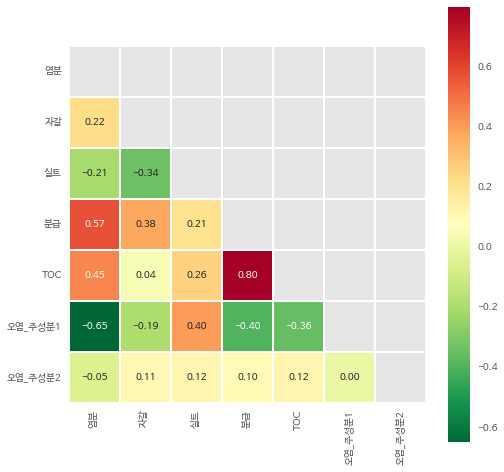

In [ ]:
# 주성분분석 수행 후, 나온 결과를 합친 'eda_data'의 히트맵을 다시 시각화해보도록 하자.
cor_data = eda_data.drop(['id', 'target'], axis = 1).corr()

# 옵션 지정
mask = np.zeros_like(cor_data, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵 시각화
plt.figure(figsize = (8, 8))
sns.heatmap(cor_data, mask = mask, square = True, linewidths = 0.5, cmap = 'RdYlGn_r', annot = True, fmt = '.2f', annot_kws = {'fontsize' : 10})
plt.show()

- 그 전의 히트맵 보다는 서로 상관계수가 높은 변수들이 적게 관측됨을 확인할 수 있습니다.


- 하지만, 여전히 상관계수가 높은 변수들이 관측되기 때문에 SMOTE 기법을 사용하여 오버샘플링 후, RandomForest 모델을 돌린다음 변수중요도를 살펴보겠습니다.

#### 3.3. Randomforest 기반 변수 중요도

In [ ]:
# 독립변수에 범주형 변수가 있기 때문에 SMOTENC 모델 객체 생성
smote = SMOTENC(categorical_features = [2, 7], random_state = 100)

# 오버샘플링 수행
X_resample, y_resample = smote.fit_sample(eda_data.drop('target', axis = 1), eda_data['target'])
X_resample = pd.DataFrame(X_resample, columns = eda_data.drop('target', axis = 1).columns)
y_resample = pd.DataFrame(y_resample, columns = ['target'], dtype='int')

for column in ['염분', '자갈', '실트', '분급', 'TOC', '오염_주성분1', '오염_주성분2']:
    X_resample[column] = X_resample[column].astype('float')

# OverSampling 데이터 합치기
model_data = pd.concat([X_resample, y_resample], axis = 1).reset_index(drop = True)
display(model_data.head())

# 독립변수, 종속변수 나누기
X = model_data.drop(['id', 'target'], axis = 1)
y = model_data['target']

# 독립변수 중에서 연속형 변수는 Scaling 수행
scaler = StandardScaler()
X.iloc[:,[0,2,3,4,5,7,8]] = scaler.fit_transform(X.iloc[:,[0,2,3,4,5,7,8]])

# 독립변수에 범주형 변수가 있기 때문에 One-Hot Encoding
X = pd.get_dummies(X, drop_first = True)

,id,염분,수소이온농도_구간,자갈,실트,분급,TOC,생체량_구간,오염_주성분1,오염_주성분2,target
0,316,32.266284,구간5,2.131936,53.767258,2.241080,0.575763,구간1,-0.792560,-0.319665,0
1,317,32.312201,구간5,2.388136,52.496485,2.224635,0.568869,구간1,-0.832183,-0.290755,0
2,401,31.337345,구간3,0.564265,35.540126,1.634023,0.383511,구간1,-1.546873,-0.558734,0
3,402,31.393658,구간2,0.541554,36.376906,1.744004,0.408045,구간1,-1.278618,-0.544470,0
4,403,31.425321,구간2,0.550979,35.998440,1.816959,0.424802,구간2,-0.942646,-0.549568,0


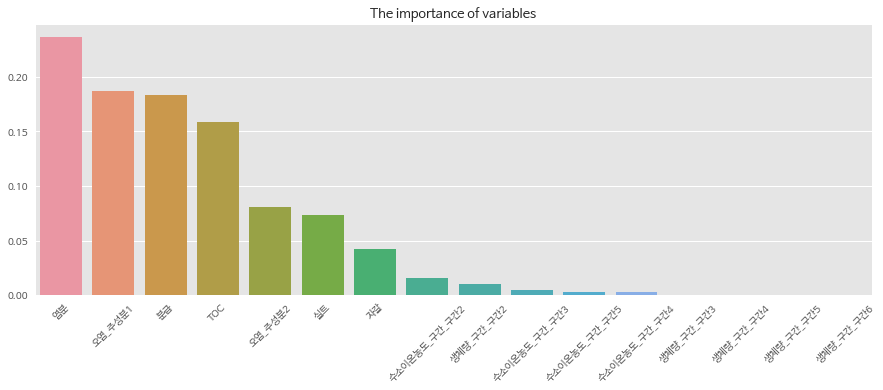

In [ ]:
# Random Forest 모델 객체 생성
rf_model = RandomForestClassifier(random_state = 100)

# 생성한 모델로 학습
rf_model.fit(X, y)

# 변수중요도 정보를 담은 데이터 생성
importance_data = pd.DataFrame(rf_model.feature_importances_, index = X.columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

# 시각화 수행
plt.figure(figsize = (15, 5))
sns.barplot(x = importance_data.index, y = 'Importance', data = importance_data)
plt.xticks(rotation = 45)
plt.ylabel('')
plt.title('The importance of variables', fontsize = 13)
plt.show()

- 위의 그림을 통해 각 변수의 중요도를 확인할 수 있으며, 범주화를 수행해주었던 변수들은 모두 중요도가 낮음을 확인할 수 있습니다.


- 위의 히트맵 그림에서 **분급**과 **TOC** 변수가 상관계수가 높음을 확인할 수 있었는데, **분급** 변수의 중요도가 더 높기 때문에 **분급** 변수를 사용하겠습니다.


- 최종적으로 사용할 변수는 **염분, 분급, 실트, 자갈, 오염_주성분1, 오염_주성분2** 총 6개입니다.

---

## **4. 데이터 모델링**

#### 4.1. 로지스틱 회귀모형

In [ ]:
# 최종적으로 사용할 변수를 선택하여 저장
final_data = eda_data[['id', '염분', '분급', '실트', '자갈', '오염_주성분1', '오염_주성분2', 'target']].copy()
print('Shape of final data :', final_data.shape, '\n')
display(final_data.head())

Shape of final data : (1399, 8) 



,id,염분,분급,실트,자갈,오염_주성분1,오염_주성분2,target
0,316,32.266284,2.241080,53.767258,2.131936,-0.792560,-0.319665,0
1,317,32.312201,2.224635,52.496485,2.388136,-0.832183,-0.290755,0
2,401,31.337345,1.634023,35.540126,0.564265,-1.546873,-0.558734,0
3,402,31.393658,1.744004,36.376906,0.541554,-1.278618,-0.544470,0
4,403,31.425321,1.816959,35.998440,0.550979,-0.942646,-0.549568,0


In [ ]:
print('Before OverSampling, the shape of X :', final_data.drop(['id', 'target'], axis = 1).shape, '\n')
print('Before OverSampling, the shapd of y :', final_data['target'].shape, '\n')

# 데이터 불균형으로 인해 SMOTE 모델 객체 생성하여 오버샘플링
smote = SMOTE(random_state = 100)

# Over Sampling
X_resample, y_resample = smote.fit_sample(final_data.drop(['id', 'target'], axis = 1), final_data['target'])
X_resample = pd.DataFrame(X_resample, columns = final_data.drop(['id', 'target'], axis = 1).columns, dtype = 'float')
y_resample = pd.DataFrame(y_resample, columns = ['target'], dtype='int')
print('After OverSampling, the shape of X :', X_resample.shape, '\n')
print('After OverSampling, the shapd of y :', y_resample.shape)

Before OverSampling, the shape of X : (1399, 6) 

Before OverSampling, the shapd of y : (1399,) 

After OverSampling, the shape of X : (2778, 6) 

After OverSampling, the shapd of y : (2778, 1)


In [ ]:
# 변수의 중요도를 파악하기 위해 독립변수 정규화
scaler = StandardScaler()

# 주성분 변수를 제외하고 정규화 수행
X_resample.iloc[:, :-2] = scaler.fit_transform(X_resample.iloc[:, :-2])

# 7:3의 비율로 Train, Test 나누기
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size = 0.3, random_state = 100)

# 로지스틱 회귀분석 모델 객체 생성 후 학습
clf_model = sm.Logit(y_train, X_train).fit()
display(clf_model.summary())

Optimization terminated successfully.
         Current function value: 0.378926
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                 1944
Model:                          Logit   Df Residuals:                     1938
Method:                           MLE   Df Model:                            5
Date:                Sat, 23 Oct 2021   Pseudo R-squ.:                  0.4532
Time:                        13:11:11   Log-Likelihood:                -736.63
converged:                       True   LL-Null:                       -1347.1
Covariance Type:            nonrobust   LLR p-value:                8.859e-262
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
염분            -1.1720      0.145     -8.084      0.000      -1.456      -0.888
분급            -0.4082      0.103     -3.968      0.000      -0.610      -0.207
실트             0.7599      0.110      6.895      0.000       0.544       0.976
자갈             0.5485      0.077      7.099      0.000       0.397       0.700
오염_주성분1        0.1947      0.031      6.180      0.000       0.133       0.256
오염_주성분2        0.0100      0.081      0.124      0.901      -0.149       0.169
==============================================================================
"""

- 로지스틱 회귀분석 결과 **오염_주성분2** 변수의 유의확률이 0.901로 유의하지 않다는 결과를 확인할 수 있습니다.


- **오염_주성분2** 변수가 유의하지 않기 때문에 해당 변수를 제외하고 다시 모델을 구축해보겠습니다.

In [ ]:
# 'X_train', 'X_test' 데이터에서 '오염_주성분2' 변수 삭제
X_train, X_test = X_train.drop('오염_주성분2', axis = 1), X_test.drop('오염_주성분2', axis = 1)

# 로지스틱 회귀분석 수행
clf_model = sm.Logit(y_train, X_train).fit()
display(clf_model.summary())

Optimization terminated successfully.
         Current function value: 0.378930
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                 1944
Model:                          Logit   Df Residuals:                     1939
Method:                           MLE   Df Model:                            4
Date:                Sat, 23 Oct 2021   Pseudo R-squ.:                  0.4532
Time:                        13:11:15   Log-Likelihood:                -736.64
converged:                       True   LL-Null:                       -1347.1
Covariance Type:            nonrobust   LLR p-value:                4.799e-263
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
염분            -1.1722      0.145     -8.084      0.000      -1.456      -0.888
분급            -0.4097      0.102     -4.010      0.000      -0.610      -0.209
실트             0.7651      0.102      7.526      0.000       0.566       0.964
자갈             0.5502      0.076      7.240      0.000       0.401       0.699
오염_주성분1        0.1952      0.031      6.259      0.000       0.134       0.256
==============================================================================
"""

- **오염_주성분2** 변수를 삭제하고 5개의 변수를 사용하여 로지스틱 회귀분석을 수행한 결과는 위와 같습니다.


- 모든 변수가 유의함을 확인할 수 있으므로, 최종적으로 5개의 변수를 사용하겠습니다.

Accuracy Score : 0.8465227817745803 

F1 Score : 0.8415841584158416 



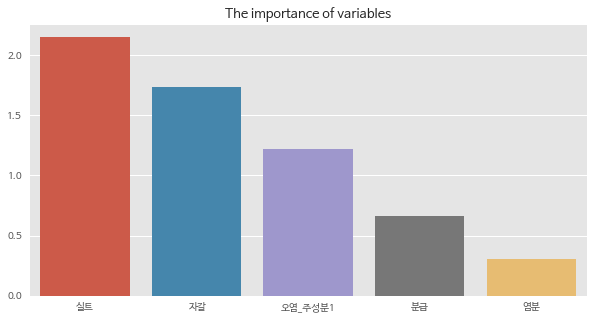

In [ ]:
# 생성한 모델로 값 예측히기
y_pred = list(map(round, clf_model.predict(X_test)))

print('Accuracy Score :', accuracy_score(y_test, y_pred), '\n')
print('F1 Score :', f1_score(y_test, y_pred), '\n')

# 변수 중요도 데이터 프레임으로 생성
logit_importance = pd.DataFrame(pow(math.e, clf_model.params), columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (10, 5))
sns.barplot(x = logit_importance.index, y = 'Importance', data = logit_importance)
plt.title('The importance of variables', fontsize = 13)
plt.ylabel('')
plt.show()

- 실트, 자갈, 오염_주성분1, 분급, 염분 순으로 로지스틱 회귀모형에서의 오즈비가 크다는 것을 알 수 있습니다.

- 예를 들어, 실트 변수가 한 단위 증가하면 갯끈풀 발생 오즈비가 2.14배 증가합니다.

- 따라서 각 변수의 오즈비를 변수의 중요도로 간주하여, 이를 클러스터링 후 위험등급을 산출하는 데에 있어서 가중치로 활용할 것입니다.

#### 4.2. KMeans Clustering

- 위에서 최종적으로 선택한 5개의 변수를 사용하여 군집분석을 수행합니다.


- 군집분석 수행 후, 각 군집의 특성이 어떠한지도 살펴보겠습니다.

In [ ]:
# 군집분석에 사용할 데이터 저장
clu_data = eda_data[['id', '실트', '자갈', '분급', '염분', '오염_주성분1', 'target']].copy()

# Scaling을 위해 MaxAbsScaler 객체 생성
scaler = MaxAbsScaler()

# 5개의 변수에서 '오염_주성분1' 변수는 제외하고 Scaling을 수행해주어야 한다.
clu_data[['실트_scale', '자갈_scale', '분급_scale', '염분_scale']] = scaler.fit_transform(clu_data[['실트', '자갈', '분급', '염분']])

# 데이터 일부 확인
display(clu_data.head())

,id,실트,자갈,분급,염분,오염_주성분1,target,실트_scale,자갈_scale,분급_scale,염분_scale
0,316,53.767258,2.131936,2.241080,32.266284,-0.792560,0,0.672737,0.086704,0.580058,0.954202
1,317,52.496485,2.388136,2.224635,32.312201,-0.832183,0,0.656837,0.097123,0.575802,0.955560
2,401,35.540126,0.564265,1.634023,31.337345,-1.546873,0,0.444679,0.022948,0.422934,0.926731
3,402,36.376906,0.541554,1.744004,31.393658,-1.278618,0,0.455148,0.022024,0.451400,0.928396
4,403,35.998440,0.550979,1.816959,31.425321,-0.942646,0,0.450413,0.022408,0.470283,0.929333


In [ ]:
# KMeans 객체 생성 후 학습시키기
kmeans = KMeans(n_clusters = 4, random_state = 0).fit(clu_data[['실트_scale', '자갈_scale', '분급_scale', '염분_scale', '오염_주성분1']])

# 각 관측치의 군집 번호 부여
clu_data['KMeans_cluster'] = kmeans.labels_

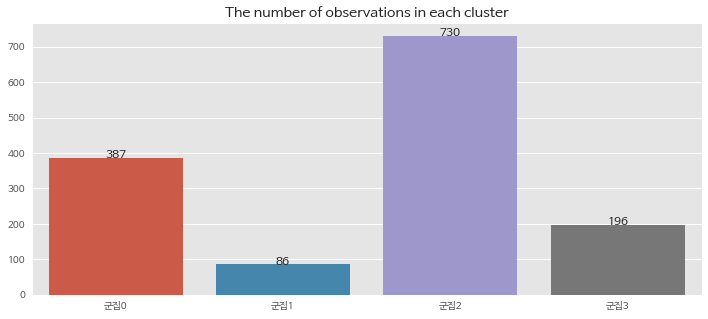

In [ ]:
# 시각화를 통해 각 군집에 몇 개의 관측치가 있는지 확인
fig, axes = plt.subplots(figsize = (12, 5))

sns.countplot(x = 'KMeans_cluster', data = clu_data)
axes.set_xticklabels(labels = ['군집0', '군집1', '군집2', '군집3'])
axes.set_ylabel('')
axes.set_xlabel('')
axes.set_title('The number of observations in each cluster')

for rect in axes.patches:
    axes.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), ha = 'center', fontsize = 12)

fig.show()

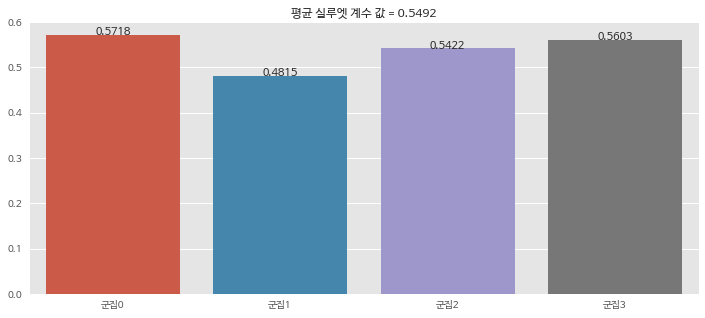

In [ ]:
# 'silhouette_samples' 함수를 사용하여 각 관측치의 실루엣 계수 값 생성
clu_data['silhouette_coeff'] = silhouette_samples(clu_data[['실트_scale', '자갈_scale', '분급_scale', '염분_scale', '오염_주성분1']], clu_data['KMeans_cluster'])

# 평균 실루엣 계수 값 구하기
mean_silhouette = np.round(silhouette_score(clu_data[['실트_scale', '자갈_scale', '분급_scale', '염분_scale', '오염_주성분1']], clu_data['KMeans_cluster']), 4)

# 그룹별 실루엣 계수 값 시각화
plt.figure(figsize = (12, 5))
plot_data = pd.DataFrame(clu_data.groupby('KMeans_cluster')['silhouette_coeff'].mean())

sns.barplot(x = plot_data.index, y = 'silhouette_coeff', data = plot_data)
plt.title('평균 실루엣 계수 값 = {}'.format(mean_silhouette), fontsize = 12)
plt.xticks(ticks = [0, 1, 2, 3], labels = ['군집0', '군집1', '군집2', '군집3'])
plt.xlabel('')
plt.ylabel('')

for index, [value] in enumerate(np.round(plot_data.values, 4)):
    plt.text(index, value, value, ha = 'center', fontsize = 11)

plt.show()

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f97300dda50>,
                     model=None)

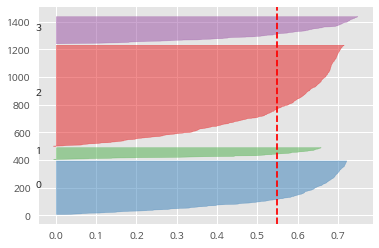

In [ ]:
# yellowbrick 패키지를 사용하여 시각화
visualizer = SilhouetteVisualizer(KMeans(n_clusters = 4, random_state = 0))
visualizer.fit(clu_data[['실트_scale', '자갈_scale', '분급_scale', '염분_scale', '오염_주성분1']])

- K-Means 알고리즘을 사용하여 군집분석을 수행하였고 군집의 개수를 4개로 하였을 때, 실루엣 계수는 위의 그림과 같습니다.


- 실루엣 계수의 값이 1로 가까워질수록 근처 군집과 더 멀리 떨어져 있다는 것을 의미하므로, 해당 군집을 잘 분리된것으로 판단됩니다.


- 이제 각 군집에 대한 5개 변수의 특징을 살펴보겠습니다.

In [ ]:
# 각 군집에 대해서 5개 변수의 평균 구하기
result_data = clu_data[['실트', '자갈', '분급', '염분', '오염_주성분1', 'KMeans_cluster', 'id', 'target']]

# 각 군집별 5개 변수 평균
pivot_data = pd.pivot_table(index = 'KMeans_cluster', data = result_data.iloc[:, :6], aggfunc = 'mean')

# 로지스틱 회귀분석 수행 후, 구해주었던 각 변수의 가중치를 곱해주기
for column in pivot_data.columns.tolist():
    
    # 'logit_importance' 데이터에서 해당 변수의 값 저장
    weight = logit_importance[logit_importance.index == column].values.flatten()
    
    # 해당 변수의 가중치를 곱하기
    pivot_data.loc[:, column] = pivot_data.loc[:, column] * weight

# 모든 변수에 가중치를 곱해주었으므로 5개 변수의 합을 구해 각 군집의 순위를 구한다.
pivot_data['rank'] = pivot_data.sum(axis = 1).rank(ascending = False).astype('int')
display(pivot_data.style.background_gradient(cmap = 'Blues'))

,분급,실트,염분,오염_주성분1,자갈,rank
KMeans_cluster,,,,,,
0,1.673981,95.332594,9.888564,-2.353578,4.836634,4
1,1.131913,133.989990,8.985394,6.008507,1.022048,1
2,1.480878,96.412408,9.762067,-0.302303,3.817002,3
3,1.289156,113.584781,8.967432,3.136656,3.673997,2


- 위에서 부여한 변수별 가중치와 각 군집별 변수 속성 평균을 곱하고, 이들을 합하여 순위를 부여했습니다.

In [ ]:
# 각 군집의 순위를 구했으므로 'result_data'에 rank 변수를 생성
result_data['rank'] = result_data['KMeans_cluster'].map({0 : 4, 1 : 1, 2 : 3, 3: 2})
display(result_data.head())

,실트,자갈,분급,염분,오염_주성분1,KMeans_cluster,id,target,rank
0,53.767258,2.131936,2.241080,32.266284,-0.792560,2,316,0,3
1,52.496485,2.388136,2.224635,32.312201,-0.832183,2,317,0,3
2,35.540126,0.564265,1.634023,31.337345,-1.546873,0,401,0,4
3,36.376906,0.541554,1.744004,31.393658,-1.278618,0,402,0,4
4,35.998440,0.550979,1.816959,31.425321,-0.942646,2,403,0,3


In [ ]:
result_data.to_csv(data_path + '/result_data.csv', encoding = 'CP949', index = False)

---

## **5. 결론**

#### 5.1. 군집 기반 위험도 시각화

- EDA와 모델링 과정을 거쳐 1,399개의 격자를 4개의 군집으로 묶어주었으며, 로지스틱 회귀모형을 통해 도출된 변수들의 가중치를 곱하고 합하여 각 군집별로 위험등급을 산출했습니다.
- QGIS를 통해 단계 시각화를 하면 아래의 그림과 같습니다.

![위험도 전체 gif](https://drive.google.com/uc?export=view&id=1H4jAmSYJr1xVtNWrs2T34OKIPHH9U_Rp)

- 위험도 1등급 격자: 86개
- 위험도 2등급 격자: 196개
- 위험도 3등급 격자: 730개
- 위험도 4등급 격자: 387개

- 전국 **위험도 1등급** 지역을 지도 상에 시각화한다면 다음과 같습니다.
- 국내 갯끈풀 서식 면적 중 **99%**를 차지하는 <a href="http://www.ecomedia.co.kr/news/newsview.php?ncode=1065571040350388">인천광역시 강화도</a>와 함께 신도, 영종도, 오이도가 위험도 1등급으로 나타났습니다.
- 갯끈풀의 주요 서식지인 인천 지역 외에도 경기도 평택시, 충청남도 서천군, 전라남도 강진군이 함께 위험도 1등급 지역으로 함께 분류되었습니다.

![위험등급 1등급](https://drive.google.com/uc?export=view&id=15qx4-n1fkDanX-WhGY3fRJuem3gSHbYX)


#### 5.2. 기대 효과

현재 해양수산부에서 <a href="https://www.mof.go.kr/article/view.do?articleKey=32216&boardKey=10&menuKey=376&currentPageNo=1">갯끈풀 제거 관련 사업</a>을 진행중에 있습니다.. 갯끈풀을 초기에 발견해서 제거한다면 완전 제거가 가능하나 골든 타임을 놓친다면 강화도처럼 확산을 막는 수준의 대처만 가능합니다.

갯끈풀 서식에 영향을 주는 변수를 도출하고 모델링을 통해 갯벌 격자별 위험등급을 산출해서 위험등급이 높은 지역을 도출하는 분석을 진행했습니다. 이를 통해 **갯끈풀 위험 지역을 꾸준히 모니터링하고 관리할 수 있는 시스템**의 초석을 다지는 것을 기대할 수 있습니다.

추가적으로 본 분석은 갯끈풀 위험 지역을 도출해내는 분석 외에도 **갯벌 데이터마트 구축**의 부가적 효과를 기대합니다. 국내 갯벌에 관한 데이터는 특정 관측소에서만 생성되며 보고서 형식으로 공개가 되고 있습니다. 본 분석에서 갯벌별 위험 등급을 산출해내기 위해 GIS를 활용하여 종합한 갯벌 격자별 데이터는 국내 모든 갯벌에 대한 데이터를 구축하기 위한 노력입니다. 본 분석에서 더 나아가 더욱 정밀하고 체계적인 프로세스를 통해 갯벌에 관한 데이터마트를 구축한다면 갯끈풀 문제 외에도 갯벌에서 발생하는 다양한 문제를 해결하는 데에 큰 도움이 될 것입니다.

#### 5.3. 한계점

앞서 제시한 기대효과에도 불구하고, 본 팀의 분석에는 몇 가지 한계점이 존재했습니다.

- 첫 번째로, **공간보간법에 따른 부정확성**입니다. 국내 연안지역에 존재하는 모든 갯벌에 대한 관측 데이터가 존재한다면 갯벌의 위험도를 더욱 정확하게 측정할 수 있을 것입니다. 하지만 모든 갯벌 지역에 대해 관측을 실시하는 것은 시간, 비용적으로 한계가 있습니다.


- 두 번째는 **갯끈풀 데이터의 부재**입니다. 갯끈풀 서식면적에 관한 데이터는 아직까지 구축되지 못했습니다. 따라서 본 분석을 진행하기 위에 갯끈풀 서식지의 위성사진을 확인하여 하나씩 QGIS에서 폴리곤을 생성해야만 했습니다. 갯끈풀의 피해 규모가 작지 않은만큼 해당 데이터에 대해 지속적으로 데이터를 쌓아줄 필요가 있습니다. 

- 세 번째로, **Joiss 관할해역 해양정보 공동활용 시스템의 데이터 부족** 문제가 있었습니다. 해양을 측정한 데이터는 존재했으나, 갯벌지역에 대한 데이터는 특별히 존재하지 않았습니다. 실제로 본 분석에서 활용한 해양환경측정망 데이터의 경우 연안해역 관련 측정데이터였기에 정확하게 인근 갯벌에 적용된다고 확신할 수는 없었습니다. 

- 마지막으로 해양환경공단에서 제공하는 국가 해양생태계 종합조사의 **시계열적 한계점**이 존재했습니다. 국가 해양생태계 종합조사는 서해, 남해를 대상으로 2017년, 2019년에 진행되었습니다. 2018년에는 동해를 대상으로 진행되었습니다. 이처럼 해당 해역에 대한 시계열적 데이터는 구축되지 못하는 실정입니다.

---

## **6. 참고문헌**

- 김은규, 길지현, 주영규, 정영상.(2015).미기록 외래잡초 영국갯끈풀의 국내 분포와 식물학적 특성.Weed&Turfgrass Science,4(1),65-70.
- 김진석 (한국화학연구원). (2016). 생태계 교란식물 cordgrass (Spartina spp.)의 효과적인 관리방안 수립을 위한 고찰.
- 해양환경공단. (2020). 2020년 갯끈풀 제거 및 관리 사업.
- 해양수산부. (2018). 갯벌파괴자 '갯끈풀' 없애고 갯벌 생태계 살린다.
- 충남기후정보브리핑. (2016). 갯벌 환경을 위협하는 갯끈풀 확산 피해 현안과 충천남도의 대책.

---

## **7. 부록**

0. 라이브러리 불러오기

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
import os
import math

import pandas as pd
import numpy as np
pd.set_option('max.columns', 1000)

import warnings
warnings.filterwarnings(action = 'ignore')

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')
%matplotlib inline

import statsmodels.api as sm
from scipy import stats

from imblearn.over_sampling import SMOTE, SMOTENC

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MaxAbsScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score, accuracy_score, silhouette_score, silhouette_samples

from yellowbrick.cluster import SilhouetteVisualizer

1. 데이터 불러오기

In [ ]:
# 현재 경로를 저장
current_path = os.getcwd()

# 사용할 데이터가 저장되어 있는 경로를 저장
data_path = input('사용할 데이터가 저장되어 있는 경로를 입력해주세요 :')

사용할 데이터가 저장되어 있는 경로를 입력해주세요 :/content/drive/Shareddrives/해양경찰_갯끈풀/Data


In [ ]:
# 데이터 불러오기
raw_coast_data = pd.read_csv(data_path + '/격자(4단계)_데이터최종결합_median.csv', encoding = 'CP949')

# '평균' 변수 제거
raw_coast_data = raw_coast_data.drop('평균', axis = 1)

# QGIS로 작업을 수행했기 때문에 변수명이 일부 잘리는 현상 발생
raw_coast_data.rename(columns = {'용존무기질' : '용존무기질소', '암모니아성' : '암모니아성 질소', '아질산성질' : '아질산성질소', '수소이온농' : '수소이온농도', '부유물질 ' : '부유물질 농도', '화학적산소' : '화학적산소 요구량'}, inplace = True)

# 데이터 일부 확인
print('Shape of Coast data :', raw_coast_data.shape, '\n')
print(raw_coast_data.info(), '\n')
display(raw_coast_data.head())

Shape of Coast data : (1399, 31) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399 entries, 0 to 1398
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         1399 non-null   int64  
 1   수온         1399 non-null   float64
 2   염분         1399 non-null   float64
 3   용존무기질소     1399 non-null   float64
 4   암모니아성 질소   1399 non-null   float64
 5   아질산성질소     1399 non-null   float64
 6   수소이온농도     1399 non-null   float64
 7   부유물질 농도    1399 non-null   float64
 8   규산염        1399 non-null   float64
 9   화학적산소 요구량  1399 non-null   float64
 10  투명도        1399 non-null   float64
 11  질소         1399 non-null   float64
 12  질산성질소      1399 non-null   float64
 13  인산염인       1399 non-null   float64
 14  클로로필       1399 non-null   float64
 15  용존산소       1399 non-null   float64
 16  총인         1399 non-null   float64
 17  자갈         1399 non-null   float64
 18  모래         1399 non-null   float64
 19  실트         13

,id,수온,염분,용존무기질소,암모니아성 질소,아질산성질소,수소이온농도,부유물질 농도,규산염,화학적산소 요구량,투명도,질소,질산성질소,인산염인,클로로필,용존산소,총인,자갈,모래,실트,점토,분급,IL,AVS,TOC,출현 종수,서식밀도,생체량,다양도,ISEP,target
0,316,26.545904,32.266284,66.109781,14.322414,6.973147,8.971842,11.729158,304.898470,1.932255,2.790482,272.399140,44.816863,9.331492,4.020105,8.383000,27.493661,2.131936,21.012963,53.767258,23.087646,2.241080,3.900139,0.012845,0.575763,13,1073,150.545300,1.715788,4.175382,0
1,317,26.555080,32.312201,64.474075,14.593280,6.735420,9.020974,11.715535,305.709195,1.920633,2.876308,269.995185,43.151896,9.239086,4.006589,8.381494,27.350137,2.388136,22.438908,52.496485,22.697930,2.224635,3.867279,0.012892,0.568869,13,1100,146.906715,1.707911,4.207599,0
2,401,24.010903,31.337345,27.902230,12.518333,2.279968,8.153232,7.047915,158.576875,1.820178,2.495793,200.074455,13.180408,7.248091,5.254767,8.494714,21.724608,0.564265,55.127657,35.540126,8.770322,1.634023,2.947883,0.006344,0.383511,13,1047,314.910615,1.745795,4.040487,0
3,402,24.195079,31.393658,42.311762,19.336271,3.228646,8.144855,7.970248,201.319945,1.867706,2.524248,217.344345,19.809824,9.458643,5.185926,8.302811,25.360672,0.541554,53.524824,36.376906,9.480037,1.744004,3.112902,0.007427,0.408045,13,1051,338.006930,1.776740,3.981114,0
4,403,24.317078,31.425321,58.525446,27.159784,4.254249,8.137352,9.072605,253.782260,1.937710,2.545189,237.580635,27.159876,12.054842,5.129125,8.086393,29.792724,0.550979,53.523564,35.998440,9.931874,1.816959,3.226403,0.008408,0.424802,14,1072,365.213195,1.810976,3.902928,0


2. 변수별 Boxplot 그래프 코드

In [ ]:
# 독립변수의 분포를 확인하고 종속변수와의 Boxplot을 시각화해주는 함수 생성
def stat_visual_analysis(indepen_value = None, depen_value = None, data = None):
    
    # 왜도, 첨도 구하기
    skew_value = np.round(stats.skew(data[indepen_value]), 4)
    kurt_value = np.round(stats.kurtosis(data[indepen_value]), 4)
    
    print('{} 변수의 왜도 :'.format(indepen_value), skew_value, '\n')
    print('{} 변수의 첨도 :'.format(indepen_value), kurt_value, '\n')
    
    # 해당 변수의 IQR 방법을 사용하여 이상치 확인하기
    Q1 = np.quantile(data[indepen_value], 0.25)
    Q3 = np.quantile(data[indepen_value], 0.75)
    
    # 1.5 가중치를 사용하여 계산
    IQR = Q3 - Q1
    IQR_weight = IQR * 1.5
    
    upper_value = Q3 + IQR_weight
    lower_value = Q1 - IQR_weight
    
    outlier_count = data[(data[indepen_value] < lower_value) | (data[indepen_value] > upper_value)].shape[0]
    print('{} 변수의 이상치 개수 :'.format(indepen_value), outlier_count, '\n')
    
    # 시각화 과정
    fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 5))
    
    # 독립변수의 Histogram 시각화
    sns.histplot(x = indepen_value, stat = 'density', data = data, ax = axes[0])
    sns.kdeplot(x = indepen_value, color = 'orange', linestyle = '--', linewidth = 5, data = data, ax = axes[0])
    
    # 독립변수의 Boxplot 시각화
    sns.boxplot(x = indepen_value, data = data, ax = axes[1])
    sns.swarmplot(x = indepen_value, alpha = 0.3, data = data, ax = axes[1])
    axes[1].axvline(upper_value, color = 'green', linewidth = 4, alpha = 0.5, linestyle = '--')
    axes[1].axvline(lower_value, color = 'green', linewidth = 4, alpha = 0.5, linestyle = '--')
    
    # 종속변수와의 Boxplot 시각화
    sns.boxplot(x = depen_value, y = indepen_value, data = data, ax = axes[2])
    sns.swarmplot(x = depen_value, y = indepen_value, alpha = 0.5, data = data, ax = axes[2])
    axes[2].set_xticklabels(['No', 'Yes'])
    
    for index in [0, 1, 2]:
        axes[index].set_title('{}'.format(indepen_value), fontsize = 12)
        axes[index].set_xlabel('')
        axes[index].set_ylabel('')
    
    fig.tight_layout()